In [38]:
import numpy as np
import pygimli as pg
import  pygimli.meshtools       as     mt
from pygimli.viewer import pv
from pygimli.physics.gravimetry import MagneticsModelling


(<AxesSubplot:>, None)

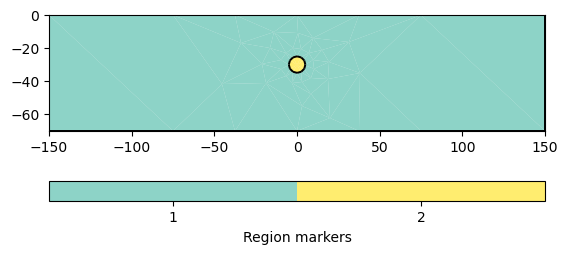

In [39]:
# Create layered subsurface
world = mt.createWorld([-150,-70], [150, 0])
circle = mt.createCircle(pos=[0, -30], radius=5, marker=2)
geom = world + circle
mesh = mt.createMesh(geom, area=10)

pg.show(geom)

In [40]:
F, I, D = 50000e-9, 75, 25
H = F * np.cos(np.deg2rad(I))
X = H * np.cos(np.deg2rad(D))
Y = H * np.sin(np.deg2rad(D))
Z = F * np.sin(np.deg2rad(I))
igrf = [D, I, H, X, Y, Z, F]

points = np.array([[x,0] for x in np.linspace(-100,100,200)])
# The forward operator
cmp = ["TFA"]  # ["Bx", "By", "Bz"]

In [44]:
fop = pg.physics.gravimetry.MagneticsModelling(mesh, points, cmp, igrf)

TypeError: 'module' object is not callable

In [27]:
model = pg.Vector(grid.cellCount(), 1.0)
data = fop.response(grid["synth"])

NameError: name 'fop' is not defined

In [31]:
dx = 50
x = np.arange(0., 1001, dx)
y = np.arange(0., 1001, dx)
z = np.arange(0., 501, dx)
grid = pg.createGrid(x, y, z)
print(grid)

v = np.zeros((len(z)-1, len(y)-1, len(x)-1))
for i in range(7):
    v[1+i, 11-i:16-i, 7:13] = 0.05

grid["synth"] = v.ravel()

pl, _ = pg.show(grid, style="wireframe", hold=True)
pv.drawMesh(pl, grid, label="synth", style="surface", cMap="Spectral_r",
            filter={"threshold": dict(value=0.05, scalars="synth")})
pl.camera_position = "yz"
pl.camera.roll = 90
pl.camera.azimuth = 180 - 15
pl.camera.elevation = 10
pl.camera.zoom(1.2)
pl.show()


F, I, D = 50000e-9, 75, 25
H = F * np.cos(np.deg2rad(I))
X = H * np.cos(np.deg2rad(D))
Y = H * np.sin(np.deg2rad(D))
Z = F * np.sin(np.deg2rad(I))
igrf = [D, I, H, X, Y, Z, F]

py, px = np.meshgrid(x, y)
px = px.ravel()
py = py.ravel()
points = np.column_stack((px, py, -np.ones_like(px)*20))

# The forward operator
cmp = ["TFA"]  # ["Bx", "By", "Bz"]
fop = MagneticsModelling(grid, points, cmp, igrf)
model = pg.Vector(grid.cellCount(), 1.0)
data = fop.response(grid["synth"])

Mesh: Nodes: 4851 Cells: 4000 Boundaries: 12800


AttributeError: 'Mesh' object has no attribute 'cell_data'